1) 인공신경망의 개요

In [3]:
# python 3.9.13 / CUDA 11.7.1 / cuDNN 8.6.0 11.X 환경

# pip install mglearn
# pip install graphviz + 구글에 graphviz 설치 후 vscode 껏다 키기
import mglearn

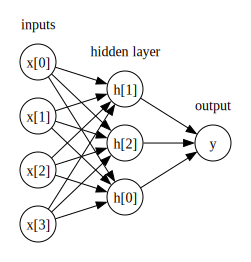

In [4]:
# 은닉층이 1개인 인공신경망        
mglearn.plots.plot_single_hidden_layer_graph()

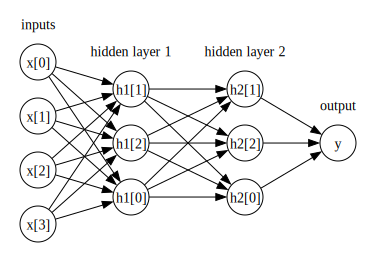

In [5]:
#은닉층이 2개인 인공신경망

mglearn.plots.plot_two_hidden_layer_graph()

In [6]:
from sklearn.datasets import make_moons

# noise 표준편차

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
#                 샘플수         표준편차    기준값
# random seed : 기준값 을 고정시켜야함

In [7]:
X

array([[ 1.87756309,  0.56839425],
       [ 0.36877983, -0.34894509],
       [ 0.96515318,  0.10921819],
       [ 0.48599685,  0.20291313],
       [ 1.72532644,  0.53367598],
       [ 1.47976586,  0.08726406],
       [ 2.11889248,  0.60498388],
       [-0.74017805,  0.49615542],
       [-0.38099245,  1.34740194],
       [ 0.22944941,  0.87981305],
       [ 1.31311917, -0.69665985],
       [ 0.87435391,  0.83750547],
       [ 0.77145295, -0.69709227],
       [ 1.26285558,  0.12916271],
       [-0.71988634,  0.69106791],
       [ 0.79205253, -0.40516241],
       [ 1.31886119, -0.41396289],
       [ 0.26579093,  0.78151982],
       [ 0.08686038,  0.49400243],
       [-0.74872343, -0.06972957],
       [ 0.88404174, -0.35425773],
       [ 1.02671711,  0.73292915],
       [ 0.73867317,  0.30808589],
       [ 1.12856036,  0.33191968],
       [ 1.15536561, -0.50593577],
       [ 1.56825139, -0.05911358],
       [ 0.29004812,  1.00820293],
       [ 0.64076308, -0.19860992],
       [-1.20034998,

In [8]:
y

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [9]:
from sklearn.model_selection import train_test_split

#stratify=y :학습용 데이터와 검증용 데이터에서 각각의 타겟값들이 동일한 비율로 나타나도록 함

X_train, X_test, y_train, y_test = train_test_split(

    X, y, test_size=0.2, stratify=y, random_state=0)
#                                    이 수치에 따라 데이터 세트 결과 다름

# 학습용 : train / 확인용 : test / validaion : 검증용 / 과적합 : over fitting
# train : validation : test == 6 : 2 : 2

# over-sampling과 under-sampling 방법 숙지 (늘리기 / 줄이기)


cross validation(교차검증) 데이터를 5세트로 나눠서 교차검증
20  20  20  20  20
test
    test
        test
            test
                test

In [10]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(random_state=0,max_iter=5000).fit(X_train, y_train)
#                                   최대반복횟수    학습

# hidden_layer_sizes=(100,) , 은닉층에서 사용할 유닛수의 기본값 : 100

# hidden_layer_sizes는 데이터 크기에 따라 적정하게 조절하는것이 중요

# 데이터가 매우 적은 상태이므로 100개를 쓰는 것보다는 줄이는 것이 좋다.

# 은닉유닛을 줄이면 모델의 복잡도는 낮아진다.

print(model.score(X_train,y_train))

print(model.score(X_test,y_test))

0.925
0.9


Text(0, 0.5, 'class 1')

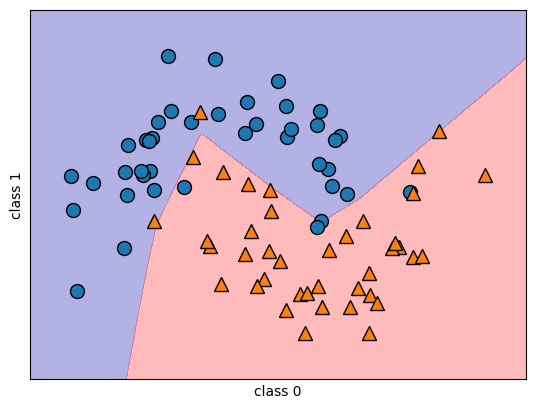

In [11]:
from matplotlib import pyplot as plt

mglearn.plots.plot_2d_separator(model, X_train, fill=True, alpha=.3)

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.xlabel("class 0")

plt.ylabel("class 1")

In [12]:
# 은닉유닛을 10개로 줄이고 테스트 - 점수가 떨어진것을 확인 할 수 있음

model = MLPClassifier(random_state=0, hidden_layer_sizes=[10], max_iter=1000)

model.fit(X_train, y_train)

print(model.score(X_train,y_train))

print(model.score(X_test,y_test))

0.85
0.85


Text(0, 0.5, 'class 1')

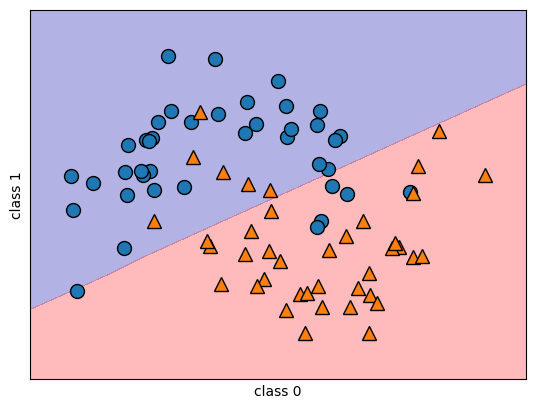

In [9]:
mglearn.plots.plot_2d_separator(model, X_train, fill=True, alpha=.3)

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.xlabel("class 0")

plt.ylabel("class 1")

In [10]:
# 10개의 유닛으로 된 두 개의 은닉층 [10,10]

model = MLPClassifier(random_state=0,hidden_layer_sizes=[10, 10], max_iter=500)

model.fit(X_train, y_train)

print(model.score(X_train,y_train))

print(model.score(X_test,y_test))

0.8375
0.85


Text(0, 0.5, 'class 1')

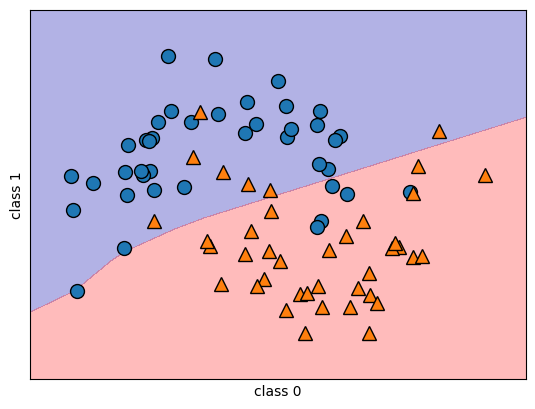

In [11]:
mglearn.plots.plot_2d_separator(model, X_train, fill=True, alpha=.3)

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.xlabel("class 0")

plt.ylabel("class 1")

1.0
1.0


Text(0, 0.5, 'class 1')

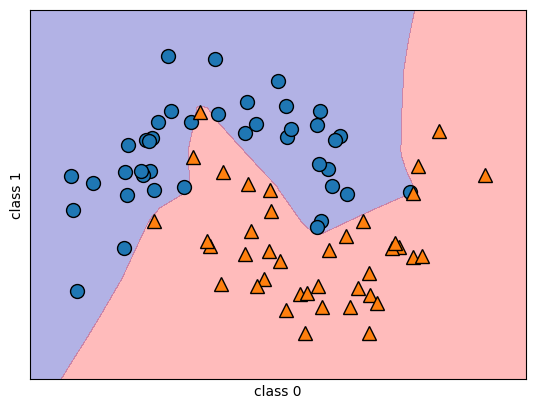

In [12]:
# 100개의 유닛으로 된 세 개의 은닉층 [100,100,100]

model = MLPClassifier(random_state=0,hidden_layer_sizes=[100,100,100], max_iter=500)

model.fit(X_train, y_train)

print(model.score(X_train,y_train))

print(model.score(X_test,y_test))

mglearn.plots.plot_2d_separator(model, X_train, fill=True, alpha=.3)

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.xlabel("class 0")

plt.ylabel("class 1")

score : 분류 정확도

confusion matrix : 혼동행렬

classification report

 precision    recall  f1-score   support
 모형         실제   
  
            0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85      0.85        20

분류    classification  객관식      accracy(정확도), roc curve
회귀    regression      주관식      mse(평균제곱오차), mae, rmse, r-squared 0.0~1.0

In [13]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
cm=confusion_matrix(y_test, pred)
cm

array([[ 7,  3],
       [ 0, 10]], dtype=int64)

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85      0.85        20

